<a href="https://colab.research.google.com/github/nishblaze7/Camcode5/blob/main/human_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install human-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.5/116.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 33.2 MB/s eta 0:00:00
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.3.4
    Uninstalling bokeh-3.3.4:
      Successfully uninstalled bokeh-3.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 1.3.8 requires bokeh<3.4.0,>=3.2.0, but you have bokeh 2.4.3 which is incompatible.


In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
from hulearn.datasets import load_titanic

df = load_titanic(as_frame=True)
X, y = df.drop(columns=['survived']), df['survived']

def fare_based(dataf, threshold=10):
    return np.array(dataf['fare'] > threshold).astype(int)


In [ ]:
from hulearn.datasets import load_titanic

df = load_titanic(as_frame=True)
X, y = df.drop(columns=['survived']), df['survived']

def fare_based(dataf, threshold=10):
    return np.array(dataf['fare'] > threshold).astype(int)

from hulearn.classification import FunctionClassifier
# This next line of code changes the function into a proper scikit-learn compatible model.
mod = FunctionClassifier(fare_based, threshold=10)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer

grid = GridSearchCV(mod,
                    cv=2,
                    param_grid={'threshold': np.linspace(0, 100, 30)},
                    scoring={'accuracy': make_scorer(accuracy_score),
                            'precision': make_scorer(precision_score),
                            'recall': make_scorer(recall_score)},
                    refit='accuracy'
                )
grid.fit(X, y)


GridSearchCV(cv=2,
             estimator=FunctionClassifier(func=<function fare_based at 0x7f7d34873eb0>,
                                          threshold=10),
             param_grid={'threshold': array([  0.        ,   3.44827586,   6.89655172,  10.34482759,
        13.79310345,  17.24137931,  20.68965517,  24.13793103,
        27.5862069 ,  31.03448276,  34.48275862,  37.93103448,
        41.37931034,  44.82758621,  48.27586207,  51.72413793,
        55.17241379,  58.62068966,  62.06896552,  65.51724138,
        68.96551724,  72.4137931 ,  75.86206897,  79.31034483,
        82.75862069,  86.20689655,  89.65517241,  93.10344828,
        96.55172414, 100.        ])},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

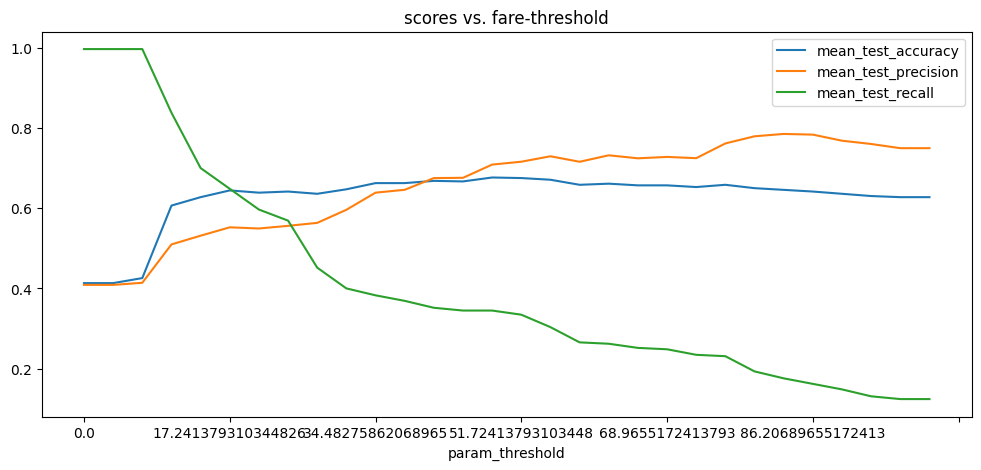

In [ ]:
score_df = (pd.DataFrame(grid.cv_results_)
  .set_index('param_threshold')
  [['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']])

score_df.plot(figsize=(12, 5), title="scores vs. fare-threshold");


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from hulearn.classification import FunctionClassifier

# Assuming X is your DataFrame with non-numeric columns
# X = your_dataframe

# Label encoding for categorical columns
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# One-hot encoding for categorical columns with more than two categories
X = pd.get_dummies(X, drop_first=True)

# Assuming y is your target variable
# y = your_target_variable

# Outlier detection model
outlier = IsolationForest().fit(X)

# Classification model
classifier = RandomForestClassifier().fit(X, y)

def make_decision(dataf, proba_threshold=0.8):
    # First we create a resulting array with all the predictions
    res = classifier.predict(dataf)

    # If we detect doubt, "classify" it as a fallback instead.
    proba = classifier.predict_proba(dataf)
    res = np.where(proba.max(axis=1) < proba_threshold, "doubt_fallback", res)

    # If we detect an outlier, we'll fallback too.
    res = np.where(outlier.predict(dataf) == -1, "outlier_fallback", res)

    # This `res` array contains the output of the drawn diagram.
    return res

fallback_model = FunctionClassifier(make_decision, proba_threshold=0.8)


In [ ]:
pip install scikit-lego

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 3.8 MB/s eta 0:00:00


In [ ]:
# Make sure you `python -m pip install scikit-lego`
from sklego.datasets import load_penguins
from hulearn.experimental.interactive import InteractiveCharts

df = load_penguins(as_frame=True).dropna()


In [ ]:
from hulearn.experimental.interactive import InteractiveCharts

clf = InteractiveCharts(df, labels="species")

# Run this in a seperate cell.
clf.add_chart(x="bill_length_mm", y="bill_depth_mm")

# Run this in a seperate cell.
clf.add_chart(x="flipper_length_mm", y="body_mass_g")


Bokeh show_app is currently unsupported
Bokeh show_app is currently unsupported


In [ ]:
from hulearn.classification import InteractiveClassifier

model = InteractiveClassifier(json_desc=clf.data())

# The `.fit(X, y)` is a formality form scikit-learn.
# It isn't "learning" anything when you run that code.
preds = model.fit(X, y).predict_proba(X)


KeyError: 'bill_length_mm'

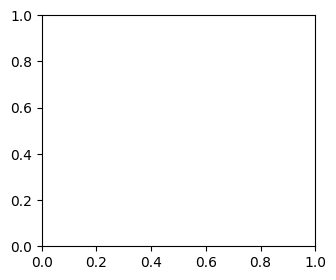

In [ ]:
import matplotlib.pylab as plt

plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(131 + i)
    plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=preds[:, i])
    plt.xlabel('bill_length_mm')
    plt.ylabel('bill_depth_mm')
    plt.title(model.classes_[i])

import matplotlib.pylab as plt

plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(131 + i)
    plt.scatter(X['flipper_length_mm'], X['body_mass_g'], c=preds[:, i])
    plt.xlabel('flipper_length_mm')
    plt.ylabel('body_mass_g')
    plt.title(model.classes_[i])


In [ ]:
old_example = pd.DataFrame([{
    'island': 'Torgersen',
    'bill_length_mm': 39.1,
    'bill_depth_mm': 18.7,
    'flipper_length_mm': 220.0,
    'body_mass_g': 5750.0,
    'sex': 'male'}
])

new_example = pd.DataFrame([{
    'island': 'Torgersen',
    'bill_length_mm': np.nan,
    'bill_depth_mm': 18.7,
    'flipper_length_mm': 220.0,
    'body_mass_g': 5750.0,
    'sex': 'male'}
])

model.predict_proba(old_example)
model.predict_proba(new_example)


array([[0.33333333, 0.33333333, 0.33333333]])

In [ ]:
from hulearn.experimental.interactive import InteractiveCharts

charts = InteractiveCharts(df, labels="species")
charts.add_chart(x="bill_length_mm", y="bill_depth_mm")


Bokeh show_app is currently unsupported


In [ ]:
from hulearn.outlier import InteractiveOutlierDetector

# Load the model using drawn-data.
model = InteractiveOutlierDetector(json_desc=charts.data())

X, y = df.drop(columns=['species']), df['species']
preds = model.fit(X, y).predict(X)


Text(0, 0.5, 'bill_depth_mm')

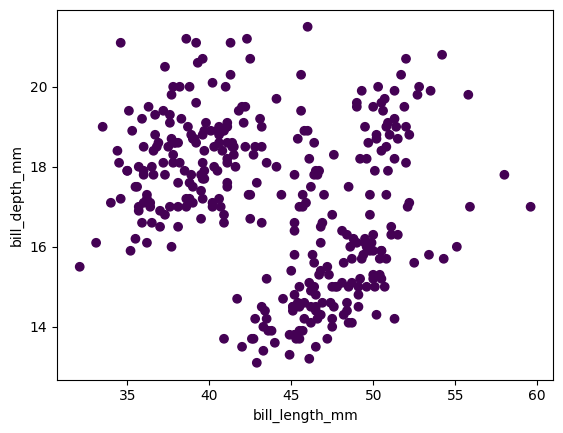

In [ ]:
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=preds)
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')


In [ ]:
from hulearn.experimental.interactive import InteractiveCharts

# Note that we now supply a list of labels to draw.
charts = InteractiveCharts(df, labels=["group_one", "group_two"])
charts.add_chart(x="bill_length_mm", y="bill_depth_mm")


Bokeh show_app is currently unsupported


In [ ]:
from hulearn.preprocessing import InteractivePreprocessor
tfm = InteractivePreprocessor(json_desc=charts.data())

# The flow for scikit-learn
tfm.fit(df).transform(df)

# The flow for pandas
df.pipe(tfm.pandas_pipe)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,group_one,group_two
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,0,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,0,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,0,0
...,...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,0,0
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,0,0
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,0,0
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,0,0
